In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
data=pd.read_csv('census.csv')
data

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [4]:
data.nunique()

39                   73
 State-gov            9
 77516            21647
 Bachelors           16
 13                  16
 Never-married        7
 Adm-clerical        15
 Not-in-family        6
 White                5
 Male                 2
 2174               119
 0                   92
 40                  94
 United-States       42
 <=50K                2
dtype: int64

In [5]:
data.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [7]:
data_cols=['Age','Work Class','fnlwgt','Education','Education Num','Marital Status','Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss','Hours','Country','Annual Revenue']

In [8]:
data.columns=data_cols

In [9]:
data

,Age,Work Class,fnlwgt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours,Country,Annual Revenue
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data=data[data['Work Class']!="?"]

In [31]:
data=data[data['Occupation']!="?"]

In [32]:
data=data[data['Country']!="?"]

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Annual Revenue']=le.fit_transform(data['Annual Revenue'])

In [34]:
data.isnull().sum()

Age               0
Work Class        0
fnlwgt            0
Education         0
Education Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours             0
Country           0
Annual Revenue    0
dtype: int64

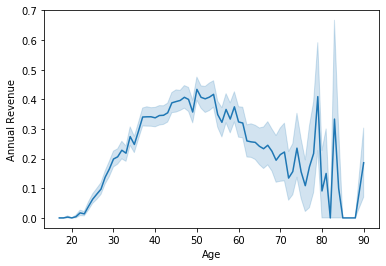

In [35]:
sns.lineplot(x='Age',y='Annual Revenue',data=data);

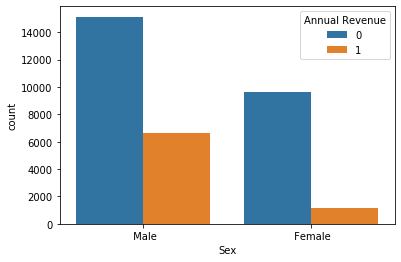

In [36]:
sns.countplot(data['Sex'],hue=data['Annual Revenue']);

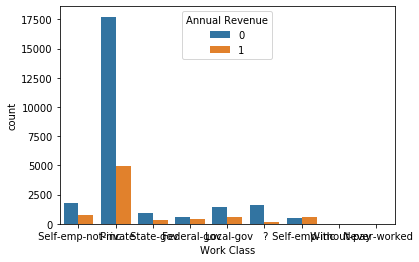

In [37]:
sns.countplot(data['Work Class'],hue=data['Annual Revenue']);

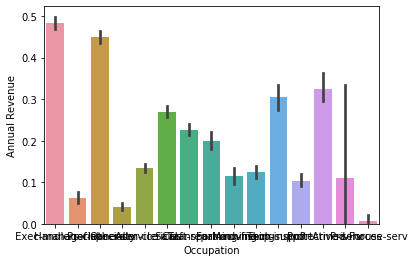

In [38]:
sns.barplot(x='Occupation',y='Annual Revenue',data=data);


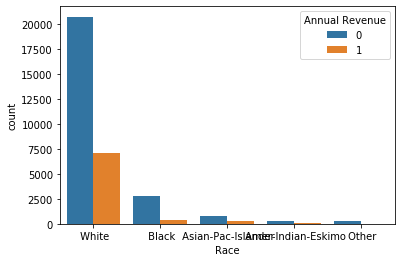

In [39]:
sns.countplot(data['Race'],hue=data['Annual Revenue']);

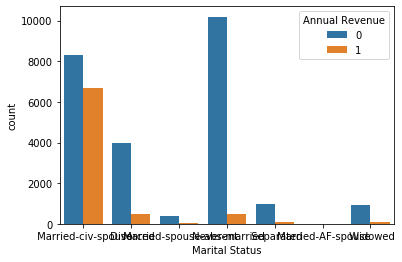

In [40]:
sns.countplot(data['Marital Status'],hue=data['Annual Revenue']);

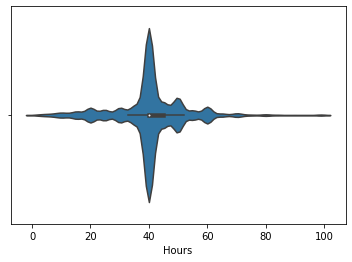

In [41]:
sns.violinplot(data['Hours']);

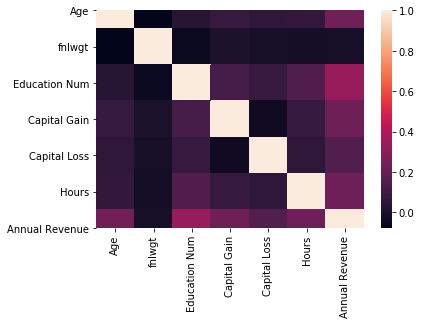

In [42]:
sns.heatmap(data.corr())

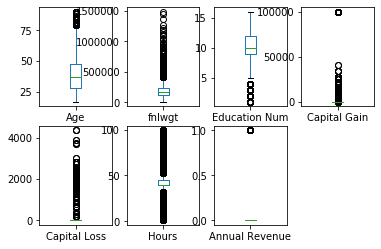

In [43]:
data.plot(kind='box',subplots=True,layout=(2,4));

In [44]:
data.skew()

Age                0.558738
fnlwgt             1.446972
Education Num     -0.311630
Capital Gain      11.953690
Capital Loss       4.594549
Hours              0.227636
Annual Revenue     1.212383
dtype: float64

In [45]:
data['fnlwgt']=np.sqrt(data['fnlwgt'])

In [46]:
data['fnlwgt'].skew()

0.18906569227479078

In [47]:
data['Education Num']=np.power(data['Education Num'],2)

In [48]:
data['Education Num'].skew()

0.5670532589321616

In [49]:
data['Capital Gain']=np.cbrt(data['Capital Gain'])

In [50]:
data['Capital Gain'].skew()

4.100149969188883

In [51]:
data['Capital Loss ']=np.sqrt(data['Capital Loss'])

In [52]:
data['Capital Loss'].skew()

4.594548858598902

In [53]:

data=pd.get_dummies(data)

In [54]:
data

,Age,fnlwgt,Education Num,Capital Gain,Capital Loss,Hours,Annual Revenue,Capital Loss,Work Class_ ?,Work Class_ Federal-gov,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,50,288.636450,169,0.000000,0,13,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,464.377002,81,0.000000,0,40,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,484.480134,49,0.000000,0,40,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,581.729318,169,0.000000,0,40,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,533.462276,196,0.000000,0,40,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,507.249446,144,0.000000,0,38,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,392.904569,81,0.000000,0,40,1,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,389.756334,81,0.000000,0,40,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,448.876375,81,0.000000,0,20,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
data.columns

Index(['Age', 'fnlwgt', 'Education Num', 'Capital Gain', 'Capital Loss',
       'Hours', 'Annual Revenue', 'Capital Loss ', 'Work Class_ ?',
       'Work Class_ Federal-gov',
       ...
       'Country_ Portugal', 'Country_ Puerto-Rico', 'Country_ Scotland',
       'Country_ South', 'Country_ Taiwan', 'Country_ Thailand',
       'Country_ Trinadad&Tobago', 'Country_ United-States',
       'Country_ Vietnam', 'Country_ Yugoslavia'],
      dtype='object', length=110)

In [56]:
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
data_final.shape

(32560, 110)


(7890, 110)

In [57]:
data=data_final
data.shape

(7890, 110)

In [58]:
df_x=data.drop(['Annual Revenue'],axis=1)
y=data['Annual Revenue']
df_x.shape,y.shape

((7890, 109), (7890,))

In [59]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Age,fnlwgt,Education Num,Capital Gain,Capital Loss,Hours,Capital Loss,Work Class_ ?,Work Class_ Federal-gov,Work Class_ Local-gov,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,0.534084,-0.135189,1.675031,4.576194,-0.027058,-0.033849,-0.027417,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.031297,-0.572532,1.675031,-0.230879,-0.027058,-1.010684,-0.027417,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.360851,-0.038922,-0.805284,-0.230879,-0.027058,-0.033849,-0.027417,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.110804,0.220977,-0.805284,-0.230879,-0.027058,-0.033849,-0.027417,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.451696,-0.271054,-0.805284,-0.230879,-0.027058,0.747619,-0.027417,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,-0.701743,0.057556,-0.805284,-0.230879,-0.027058,2.310556,-0.027417,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7886,-1.113686,0.323307,-0.269762,-0.230879,-0.027058,-0.033849,-0.027417,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7887,0.122142,0.075701,-0.269762,-0.230879,-0.027058,-0.131532,-0.027417,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7888,-0.125024,-0.126737,1.675031,-0.230879,-0.027058,1.431404,-0.027417,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [61]:
lr=LogisticRegression()
svc=SVC()
nb=GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
ad=AdaBoostClassifier()

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=.20)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr.score(x_train,y_train)

0.8425221799746515

In [63]:
model_list=[]
model_list.append(('LogisticRegression',lr))
model_list.append(('SVC',svc))
model_list.append(('Kneighbors',knn))
model_list.append(('DecisionTreeClassifier',dt))
model_list.append(('GaussianNB',nb))
model_list.append(('RandomForestClassifier',rf))
model_list.append(('GradientBoostingClassifier',gb))
model_list.append(('XGBoostClassifier',xgb))
model_list.append(('AdBoostingClassifier',ad))

********************** LogisticRegression ************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy is  0.844106463878327


cross_val is  0.8410665191978604


F1_score is 0.5886287625418061


roc_auc_score 0.7264840618438633


classification report               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1240
           1       0.68      0.52      0.59       338

    accuracy                           0.84      1578
   macro avg       0.78      0.73      0.75      1578
weighted avg       0.83      0.84      0.84      1578



confusion matrix
 [[1156   84]
 [ 162  176]]





********************** SVC ************************
SVC(C=1.0, cache_

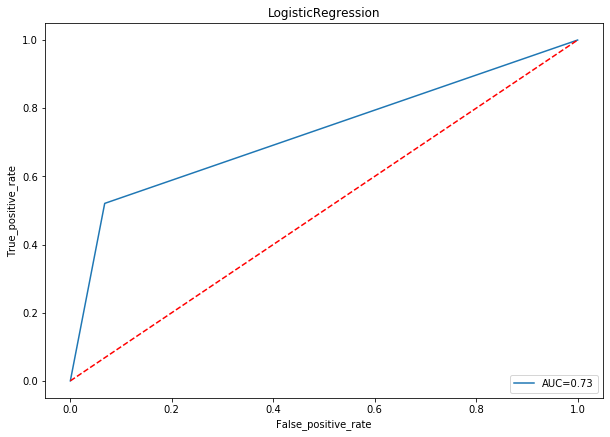

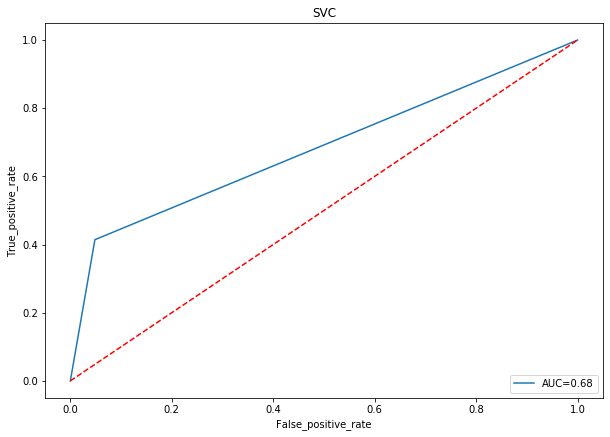

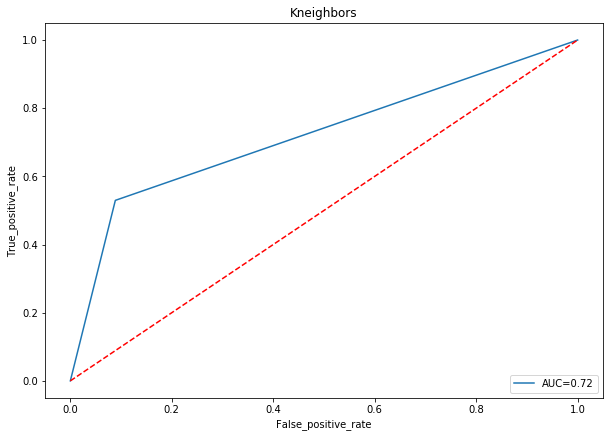

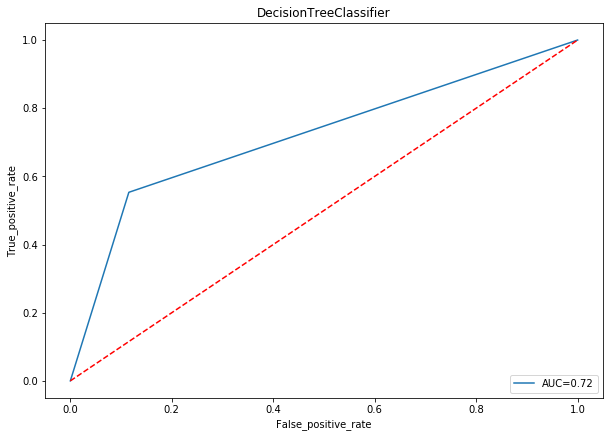

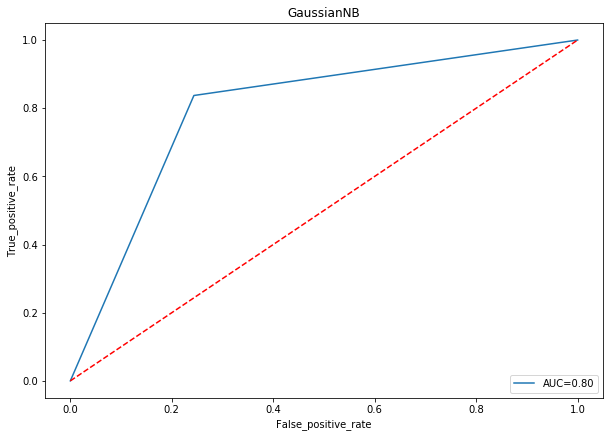

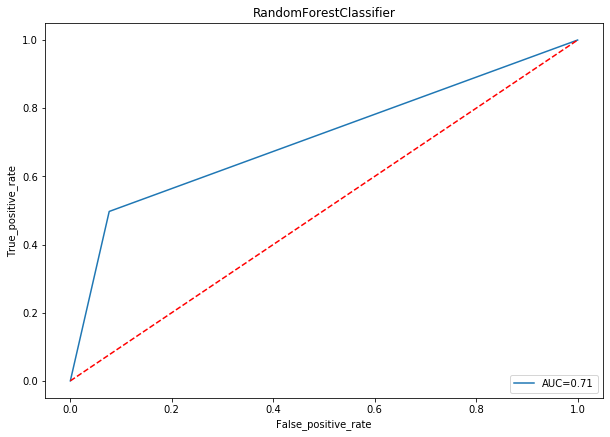

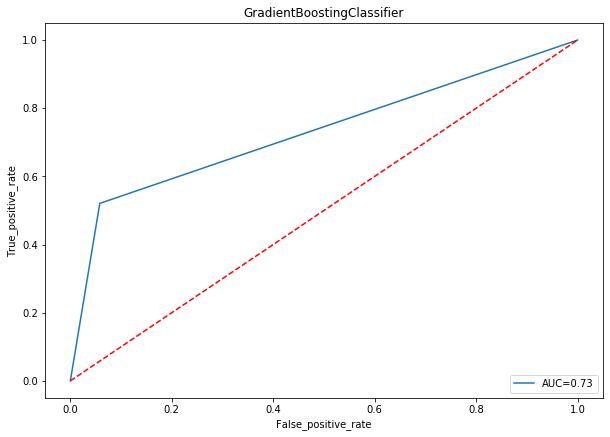

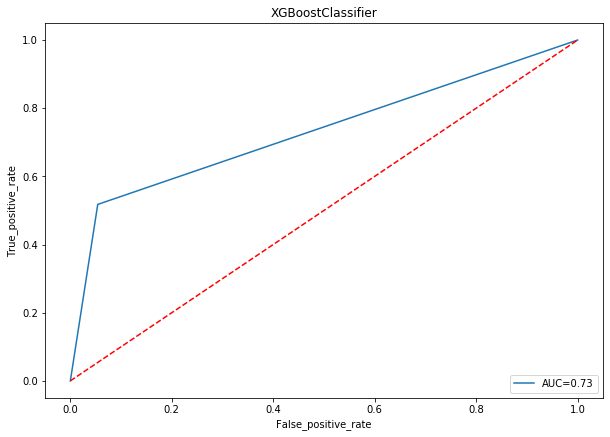

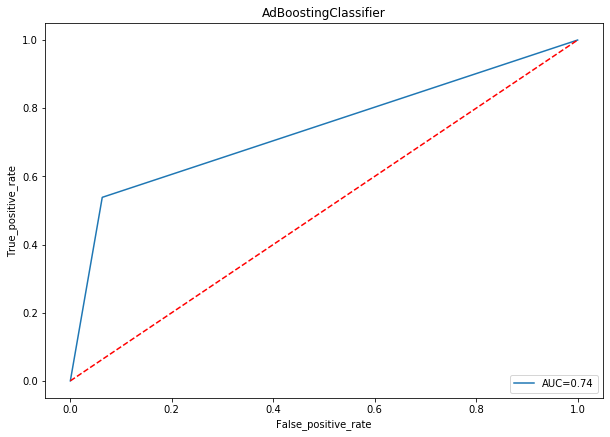

In [64]:
Model=[]
accuracy=[]
CS=[]
F1_score=[]
rocscore=[]
for name,model in model_list:
    print('**********************',name,'************************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(pred,y_test)
    print('accuracy is ',AS)
    accuracy.append(AS*100)
    print('\n')
    cs=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val is ',cs)
    CS.append(cs*100)
    print('\n')
    f1=f1_score(y_test,pred)
    print('F1_score is',f1)
    F1_score.append(f1*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('confusion matrix\n',confusion_matrix(y_test,pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(511)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False_positive_rate')
    plt.ylabel('True_positive_rate')
    print('\n\n')

In [65]:
best_model=pd.DataFrame({'Model': Model,'Accuracy':accuracy,'CV_Score':CS,'F1_Score':F1_score,'Roc_score':rocscore})
best_model

,Model,Accuracy,CV_Score,F1_Score,Roc_score
0,LogisticRegression,84.410646,84.106652,58.862876,72.648406
1,SVC,83.650190,83.739338,52.044610,68.290704
2,Kneighbors,82.953105,82.307096,57.097289,72.043806
3,DecisionTreeClassifier,81.368821,79.695486,55.988024,71.896593
4,GaussianNB,77.376426,75.424028,61.321777,79.686486
5,RandomForestClassifier,83.206591,82.344540,55.906822,71.021426
6,GradientBoostingClassifier,85.171103,85.437131,60.068259,73.132277
7,XGBoostClassifier,85.424588,85.373920,60.344828,73.185961
8,AdBoostingClassifier,85.171103,85.310308,60.869565,73.777916


In [66]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
knngd=GridSearchCV(knn,param_grid=[{'n_neighbors':[i for i in range(1,33,2)],
                                 'weights':['uniform','distance']}],cv=5)
knngd.fit(x_train,y_train)
print(knngd.best_score_)
print(knngd.best_params_)
                             

0.8371356147021546
{'n_neighbors': 31, 'weights': 'uniform'}


In [67]:
rf=RandomForestClassifier()
gd=GridSearchCV(rf,param_grid=[{'n_estimators':[50,100,150,200],
                                'criterion':['gini','entropy'],
                                 
                                 'max_depth':[2,3,5,7,8]}],cv=10)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

0.8456907477820025
{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 150}


In [68]:
gb=GradientBoostingClassifier()
gd=GridSearchCV(gb,param_grid=[{'n_estimators':[50,100,150,200],
                                'loss':['deviance','exponential'],
                                 
                                 'max_depth':[2,3,4,5,6,7,8]}],cv=10)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)


0.8532953105196451
{'loss': 'deviance', 'max_depth': 3, 'n_estimators': 150}


In [69]:
from sklearn.model_selection import GridSearchCV
xgb=XGBClassifier()
gd=GridSearchCV(xgb,param_grid=[{'n_estimators':[100,150,200],
                                 'max_depth':[2,3,4,5,6,7,8],
                                  }],cv=10)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)


0.8540874524714829
{'max_depth': 4, 'n_estimators': 100}


In [70]:
from sklearn.model_selection import GridSearchCV
ad=AdaBoostClassifier()
gd=GridSearchCV(ad,param_grid=[{'base_estimator':[gb]}],cv=10)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)


0.8241444866920152
{'base_estimator': GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)}


In [71]:
from sklearn.model_selection import GridSearchCV
ad=AdaBoostClassifier()
gd=GridSearchCV(ad,param_grid=[{'base_estimator':[rf]}],cv=10)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)


0.8127376425855514
{'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)}


No handles with labels found to put in legend.


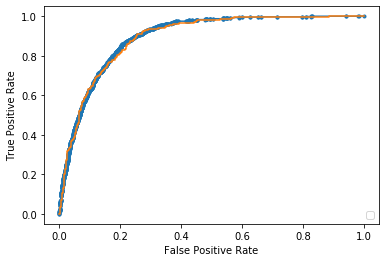

In [72]:
lr_train_probs=lr.predict_proba(x_train)
lr_test_probs=lr.predict_proba(x_test)
lr_train_probs=lr_train_probs[:,1]
lr_test_probs=lr_test_probs[:,1]
lr_train_fpr,lr_train_tpr,train_threshold=roc_curve(y_train,lr_train_probs)
lr_test_fpr,lr_test_tpr,test_threshold=roc_curve(y_test,lr_test_probs)
plt.plot(lr_train_fpr,lr_train_tpr,marker='.')
plt.plot(lr_test_fpr,lr_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


No handles with labels found to put in legend.


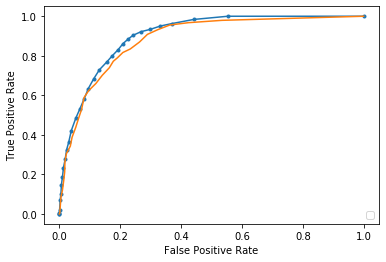

In [73]:
knngd_train_probs=knngd.predict_proba(x_train)
knngd_test_probs=knngd.predict_proba(x_test)
knngd_train_probs=knngd_train_probs[:,1]
knngd_test_probs=knngd_test_probs[:,1]
knngd_train_fpr,knngd_train_tpr,train_threshold=roc_curve(y_train,knngd_train_probs)
knngd_test_fpr,knngd_test_tpr,test_threshold=roc_curve(y_test,knngd_test_probs)
plt.plot(knngd_train_fpr,knngd_train_tpr,marker='.')
plt.plot(knngd_test_fpr,knngd_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [74]:
from sklearn.externals import joblib
joblib.dump(xgb,'Census_joblib')

['Census_joblib']